In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.shape

(159571, 8)

In [ ]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
clean_comments = train.iloc[:, 2:].sum(axis=1) == 0
print(f"Clean comments make up {round(clean_comments.sum() / len(train)* 100, 2)} % of the Training Data")

Clean comments make up 89.83 % of the Training Data


In [ ]:
print("Null values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)

Null values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
filling NA with "unknown"


In [ ]:
clean_series = pd.Series(clean_comments.sum(), index=['clean'])
tags = train.iloc[:, 2:].sum()
tags = tags.append(clean_series)
tags = tags.sort_values()

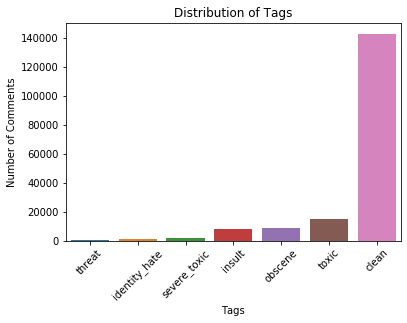

In [ ]:
fig, ax = plt.subplots()

ax = sns.barplot(x=tags.index, y=tags)
ax.tick_params(axis='x', rotation=45)
ax.set(xlabel='Tags', ylabel='Number of Comments', title='Distribution of Tags')
plt.show()

In [ ]:
# Let's see the length of the comments
# It varies a lot
lens = train.comment_text.str.len()
print(f"Mean of length is: {round(lens.mean(), 2)}")
print(f"STD of length is: {round(lens.std(), 2)}")
print(f"Max of length is: {lens.max()}")

Mean of length is: 394.07
STD of length is: 590.72
Max of length is: 5000


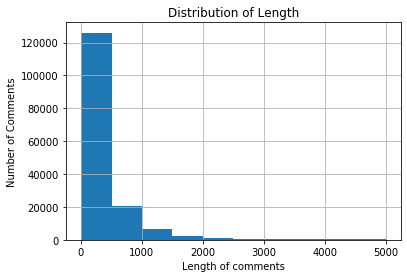

In [ ]:
fig, ax = plt.subplots()

ax = lens.hist()
ax.tick_params(axis='x')
ax.set(xlabel='Length of comments', ylabel='Number of Comments', title='Distribution of Length')
plt.show()

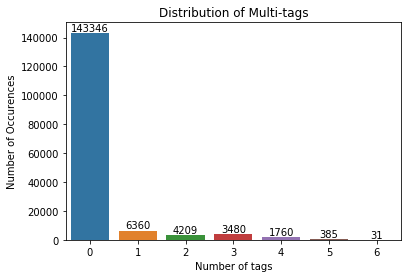

In [ ]:
# Let's check how many comments have multiple tags.
total_tags = train.iloc[:, 2:].sum(axis=1)
tags_value_counts = total_tags.value_counts()

fig, ax = plt.subplots()

ax = sns.barplot(tags_value_counts.index, tags_value_counts.values)
#adding the text labels
rects = ax.patches
labels = tags_value_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
ax.set(xlabel='Number of tags', ylabel='Number of Occurences', title='Distribution of Multi-tags')
plt.show()

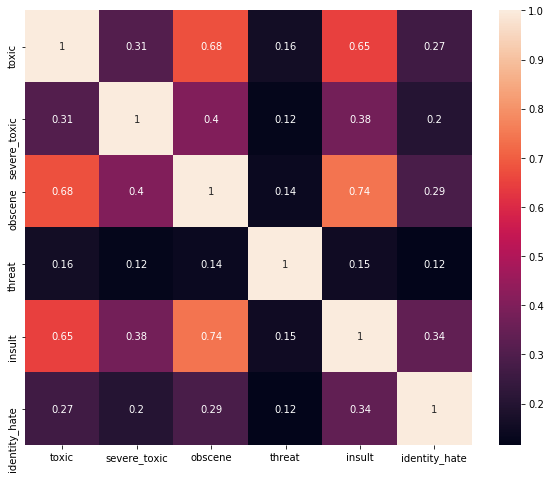

In [ ]:
# Let's check correlation
tags=train.iloc[:,2:]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=tags.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

In [ ]:
# WordCloud
train_bad = train[train.iloc[:, 2:].sum(axis=1) > 0]
train_bad.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


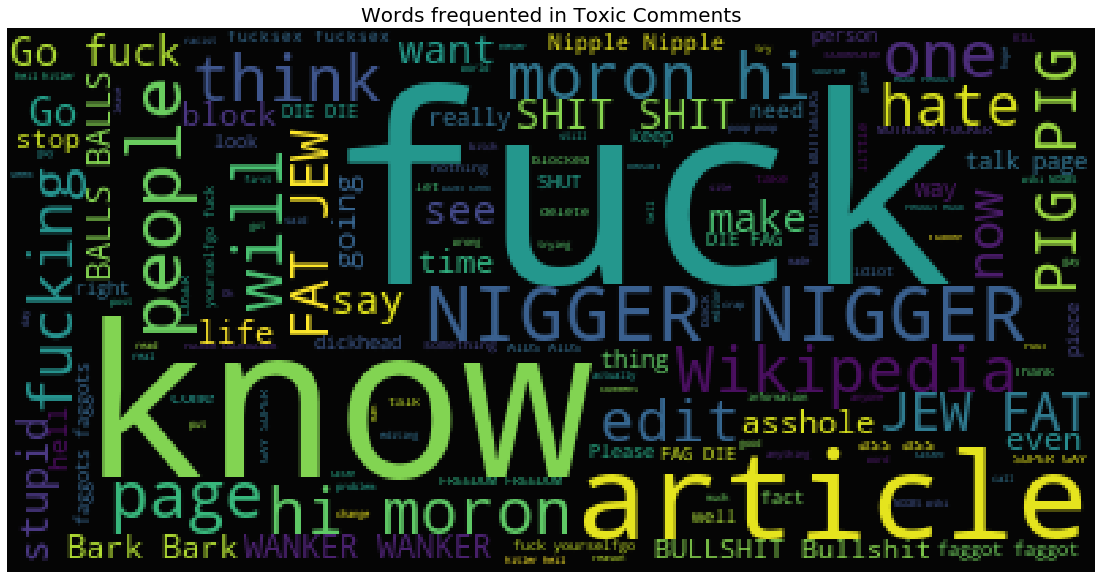

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=train_bad.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()